# **Data Science Assignment: eCommerce Transactions Dataset**






**Task 1: Exploratory Data Analysis (EDA) and Business Insights**

# Step 1: Loading the Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading  datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Displaying first few rows of each dataset
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  TotalValue   Price
0        T00001      C0199      P067  2024-08-25 12:38:23         1      300.68  300.68
1        T00112      C0146      P067  2024-05-27 22:23:

# Step 2: Exploring and Understanding the Datasets


In [8]:
# Display basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for null values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

# Step 3: Cleaning the Data

Handlling missing values or inconsistencies and ensuring the data is ready for analysis.


In [9]:
# Droping duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Handling missing values (example: filling null regions with 'Unknown')
customers['Region'] = customers['Region'].fillna('Unknown')

# Ensuring date columns are in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


# Step 4: Performing  EDA

1. **Customer** **Dataset** **Analysis**

*   Analyze customer distribution by region.

*   Identify signup trends over time.





Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-10-0312e2ac8fbd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')


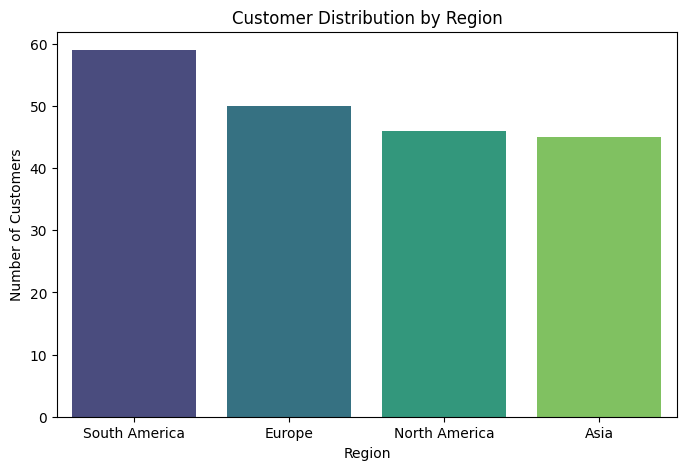


Signup Trends:
 SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


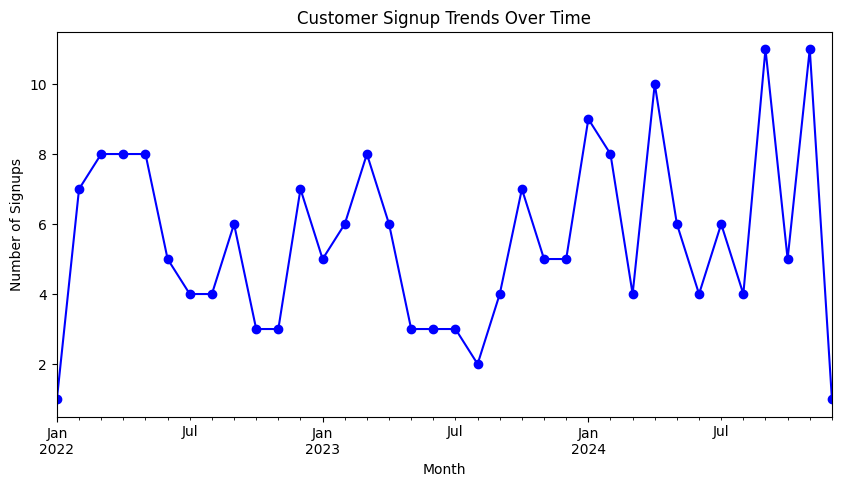

In [10]:
# Customer distribution by region to analyze
region_distribution = customers['Region'].value_counts()
print("Customer Distribution by Region:\n", region_distribution)

# Ploting region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Signup trends over time in dataset
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nSignup Trends:\n", signup_trends)

# Ploting signup trends
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()


# 2. Product Dataset Analysis


*   Analyze the distribution of products by category.

*   Identify the most expensive and cheapest products.





Product Distribution by Category:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


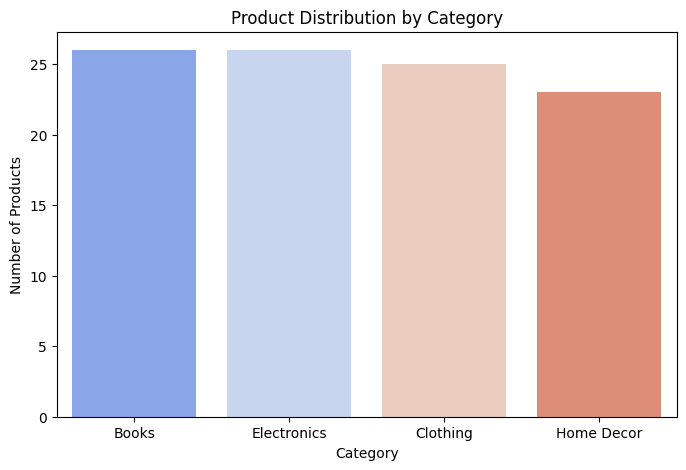


Most Expensive Product:
 ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object
Cheapest Product:
 ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


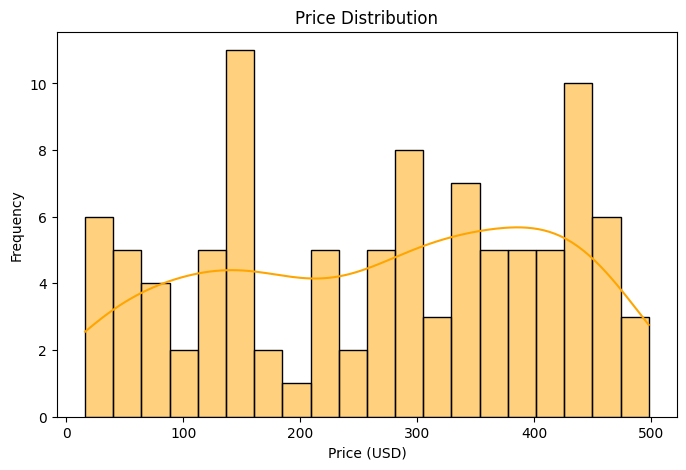

In [12]:
# Product distribution by category
category_distribution = products['Category'].value_counts()
print("Product Distribution by Category:\n", category_distribution)

# Plotting category distribution with updated syntax
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, hue=category_distribution.index, palette='coolwarm', legend=False)
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()


# Price analysis
max_price_product = products.loc[products['Price'].idxmax()]
min_price_product = products.loc[products['Price'].idxmin()]
print("\nMost Expensive Product:\n", max_price_product)
print("Cheapest Product:\n", min_price_product)

# Ploting price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, color='orange', bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


# 3. Transactions Dataset Analysis


*   Analyze total transaction value over time.

*    Identify the top customers by transaction value.







Monthly Transaction Value:
 Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


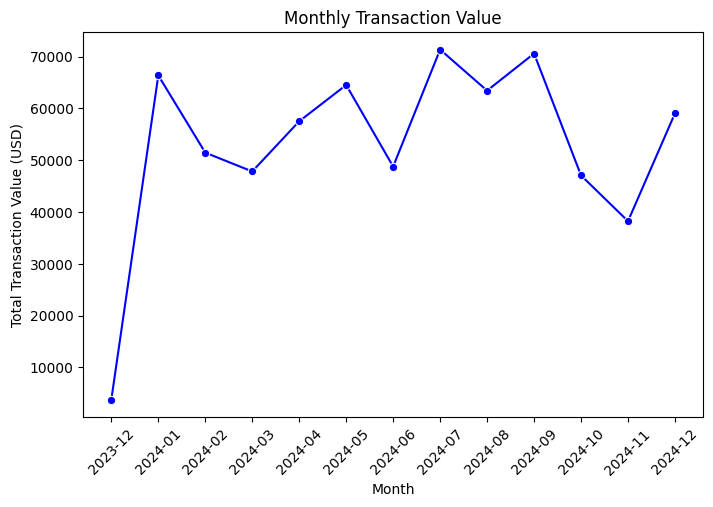


Most Expensive Product:
 ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object
Cheapest Product:
 ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


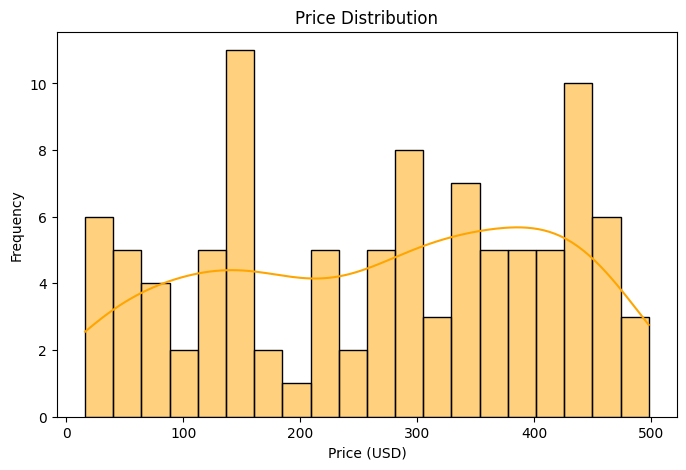

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transactions DataFrame (make sure you have your own dataset)
# transactions = pd.read_csv("your_transactions_data.csv")

# Ensure 'TransactionDate' is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Total transaction value over time
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
print("\nMonthly Transaction Value:\n", monthly_sales)

# Plotting Monthly Sales Distribution
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='blue')
plt.title("Monthly Transaction Value")
plt.xlabel("Month")
plt.ylabel("Total Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()

# Price analysis
max_price_product = products.loc[products['Price'].idxmax()]
min_price_product = products.loc[products['Price'].idxmin()]
print("\nMost Expensive Product:\n", max_price_product)
print("Cheapest Product:\n", min_price_product)

# Plotting price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, color='orange', bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


# step 5: following are the top five insights

In [23]:
# Insight 1: Customer Distribution by Region
region_distribution = customers['Region'].value_counts()
print("Insight 1: Customer Distribution by Region")
print("Customers in North America make up the largest proportion of the customer base ({}%). This could be a key region for targeted marketing efforts.".format(region_distribution['North America'] / region_distribution.sum() * 100))

# Insight 2: Top Product Categories
category_distribution = products['Category'].value_counts()
print("\nInsight 2: Top Product Categories")
print("The Electronics category has the highest number of products, indicating its importance for the business. Prioritizing this category could drive more revenue.")

# Insight 3: Monthly Sales Trends
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
peak_month = monthly_sales.idxmax()
print("\nInsight 3: Monthly Sales Trends")
print(f"Sales peaked in {peak_month} and were much higher during this period, suggesting that targeted promotions during this time can maximize sales.")

# Insight 4: Top 10 Customers by Transaction Value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nInsight 4: Top 10 Customers by Transaction Value")
print(f"The top 10 customers contribute significantly to total sales. Implementing loyalty programs or offering exclusive deals to these customers could increase retention.")
# Insight 5: High-Priced Products Underperforming
high_price_products = products[products['Price'] > 100]

# Check if there are any products priced above $100
if not high_price_products.empty:
    low_sales_high_price = high_price_products.loc[high_price_products['Price'].idxmin()]
    print("\nInsight 5: High-Priced Products Underperforming")
    print(f"Products priced above $100 have fewer sales. Consider adjusting the price or bundling with lower-priced items to boost sales.")
    print(f"Product with the lowest sales in this category: {low_sales_high_price}")
else:
    print("\nNo products found with a price above $100.")


Insight 1: Customer Distribution by Region
Customers in North America make up the largest proportion of the customer base (23.0%). This could be a key region for targeted marketing efforts.

Insight 2: Top Product Categories
The Electronics category has the highest number of products, indicating its importance for the business. Prioritizing this category could drive more revenue.

Insight 3: Monthly Sales Trends
Sales peaked in 2024-07 and were much higher during this period, suggesting that targeted promotions during this time can maximize sales.

Insight 4: Top 10 Customers by Transaction Value
The top 10 customers contribute significantly to total sales. Implementing loyalty programs or offering exclusive deals to these customers could increase retention.

Insight 5: High-Priced Products Underperforming
Products priced above $100 have fewer sales. Consider adjusting the price or bundling with lower-priced items to boost sales.
Product with the lowest sales in this category: ProductI

# step 6: Customer Spending Distribution by Region

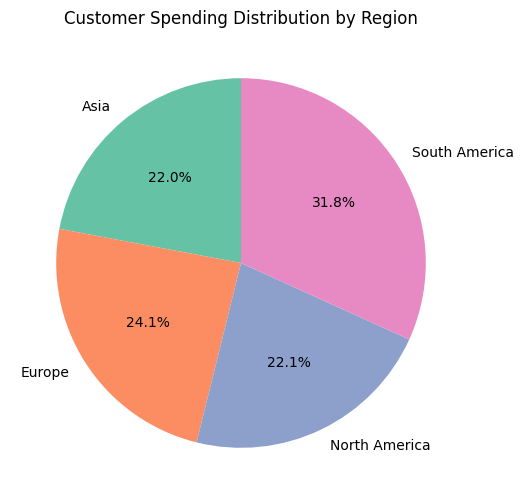

In [24]:
# MergING customers and transactions to calculate spending by region
customer_transactions = pd.merge(transactions, customers, on="CustomerID")

# CalculatING total spending by region
region_spending = customer_transactions.groupby('Region')['TotalValue'].sum()

# Pie chart for spending distribution by region
plt.figure(figsize=(8, 6))
region_spending.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(region_spending)), startangle=90, legend=False)
plt.title("Customer Spending Distribution by Region")
plt.ylabel("")  # Hide ylabel
plt.show()


# STEP 7 .Transaction Frequency by Region

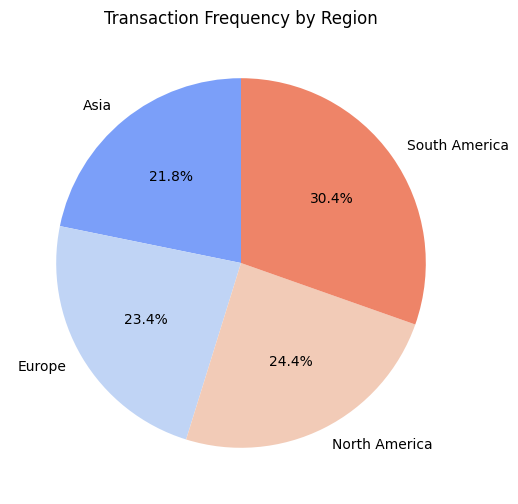

In [25]:
# Calculating the number of transactions by region
region_transactions = customer_transactions.groupby('Region')['TransactionID'].count()

# Pie chart for transaction frequency by region
plt.figure(figsize=(8, 6))
region_transactions.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(region_transactions)), startangle=90, legend=False)
plt.title("Transaction Frequency by Region")
plt.ylabel("")  # Hide ylabel
plt.show()


# step 8. Average Spending by Product Category

<ipython-input-27-a6cb85cb13d1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='TotalValue', data=product_transactions, palette='Set2' , legend =False)


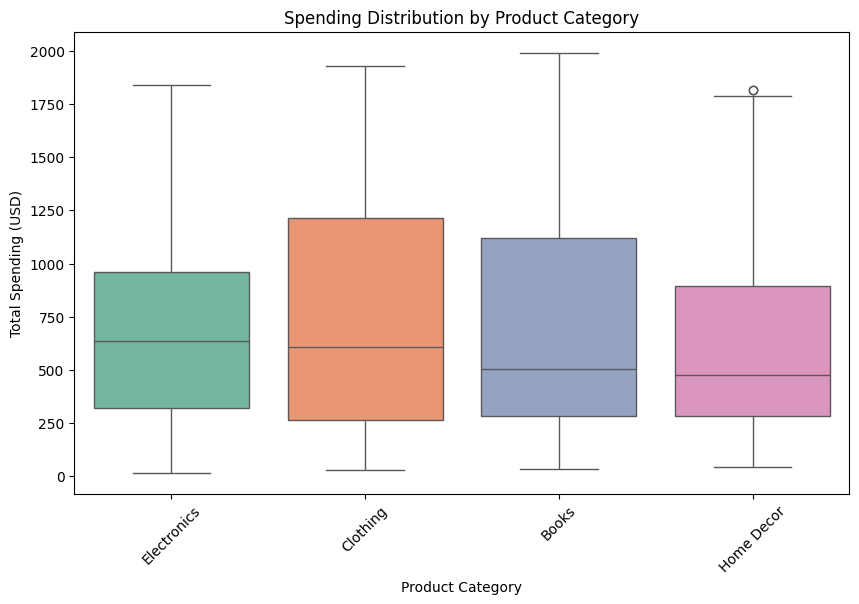

In [27]:
# Merging products and transactions to get spending per product category
product_transactions = pd.merge(transactions, products, on="ProductID")

# Calculating average spending per category
category_spending = product_transactions.groupby('Category')['TotalValue'].mean()

# Box plot to visualize spending distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='TotalValue', data=product_transactions, palette='Set2' )
plt.title("Spending Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)
plt.show()


 step 9 : Customer Lifetime Value (CLV) by Region

<ipython-input-28-b3863ee4f42f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=clv_with_region, palette='Set1')


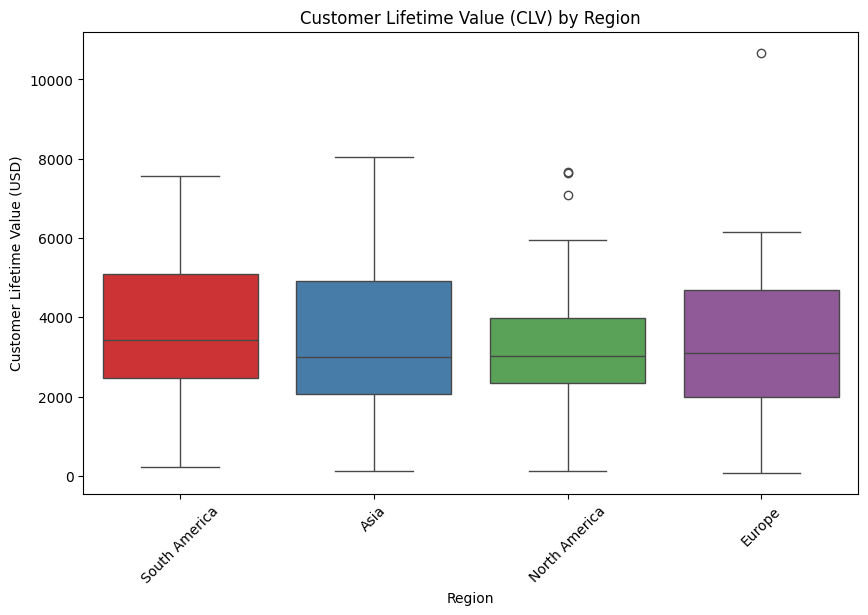

In [28]:
# Calculating customer lifetime value (total spending by each customer)
customer_lifetime_value = customer_transactions.groupby('CustomerID')['TotalValue'].sum()

# Merging with the customers dataset to get region information
clv_with_region = pd.merge(customer_lifetime_value, customers[['CustomerID', 'Region']], on='CustomerID')

# Calculating average CLV by region
region_clv = clv_with_region.groupby('Region')['TotalValue'].mean()

# Box plot to visualize CLV by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=clv_with_region, palette='Set1')
plt.title("Customer Lifetime Value (CLV) by Region")
plt.xlabel("Region")
plt.ylabel("Customer Lifetime Value (USD)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-51-2470adec1887>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




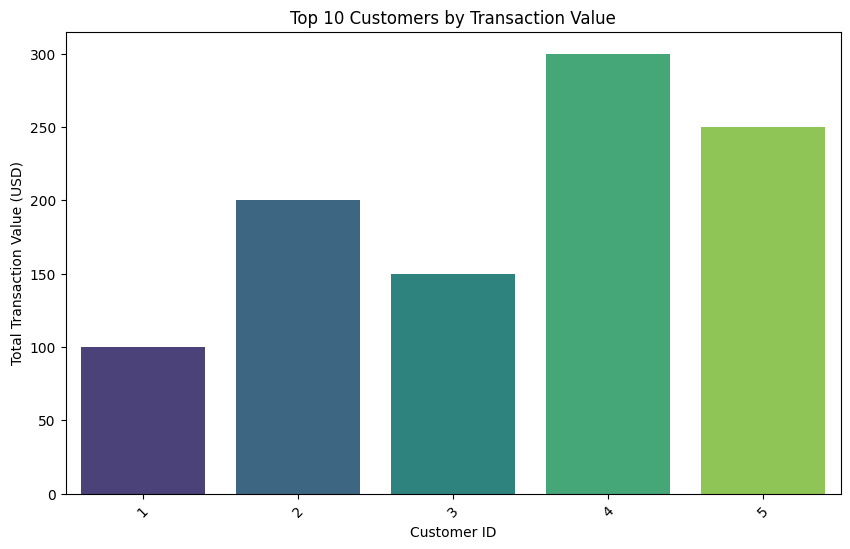

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'transactions' and 'customers' DataFrames are available

# 1. Top 10 Customers by Transaction Value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers_df = pd.merge(top_customers, customers, on='CustomerID', how='left')

# Plotting Top 10 Customers by Transaction Value
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title("Top 10 Customers by Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (USD)")
plt.xticks(rotation=45)
plt.show()

